In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
trainset = torchvision.datasets.SVHN(root='./datasets',
                                    split='train',
                                    download=True,
                                    transform=transforms.ToTensor())

In [3]:
trainset

Dataset SVHN
    Number of datapoints: 73257
    Split: train
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [4]:
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=8,
                                         shuffle=True,
                                         num_workers=2)

In [6]:
testset = torchvision.datasets.SVHN(root='./datasets',
                                   split='test',
                                   download=True,
                                   transform=transforms.ToTensor())

Using downloaded and verified file: ./datasets\test_32x32.mat


In [7]:
testset

Dataset SVHN
    Number of datapoints: 26032
    Split: test
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
testloader = torch.utils.data.DataLoader(testset,
                                        batch_size=8,
                                        shuffle=False,
                                        num_workers=2)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
images_batch, target_batch = iter(trainloader).next()

In [18]:
images_batch.shape

torch.Size([8, 3, 32, 32])

In [19]:
img = torchvision.utils.make_grid(images_batch)

In [20]:
img.shape

torch.Size([3, 36, 274])

In [21]:
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

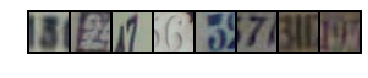

In [22]:
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [23]:
import torch.nn as nn

In [24]:
in_size = 3
hid1_size = 16
hid2_size = 32
out_size = 10
k_conv_size = 5

In [29]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [30]:
model = ConvNet()

In [31]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                            lr=learning_rate)

In [33]:
total_step = len(trainloader)
num_epochs = 5

for epoch in range(num_epochs):
    for i, (images, targets) in enumerate(trainloader):
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%2000==0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            

Epoch [1/5], Step [2000/9158], Loss: 0.9509
Epoch [1/5], Step [4000/9158], Loss: 0.3441
Epoch [1/5], Step [6000/9158], Loss: 1.3144
Epoch [1/5], Step [8000/9158], Loss: 0.6698
Epoch [2/5], Step [2000/9158], Loss: 0.8366
Epoch [2/5], Step [4000/9158], Loss: 0.5347
Epoch [2/5], Step [6000/9158], Loss: 0.2740
Epoch [2/5], Step [8000/9158], Loss: 0.7660
Epoch [3/5], Step [2000/9158], Loss: 0.0353
Epoch [3/5], Step [4000/9158], Loss: 0.0680
Epoch [3/5], Step [6000/9158], Loss: 0.0474
Epoch [3/5], Step [8000/9158], Loss: 0.4159
Epoch [4/5], Step [2000/9158], Loss: 0.2463
Epoch [4/5], Step [4000/9158], Loss: 0.2522
Epoch [4/5], Step [6000/9158], Loss: 0.0061
Epoch [4/5], Step [8000/9158], Loss: 0.1110
Epoch [5/5], Step [2000/9158], Loss: 0.9753
Epoch [5/5], Step [4000/9158], Loss: 0.9310
Epoch [5/5], Step [6000/9158], Loss: 0.0274
Epoch [5/5], Step [8000/9158], Loss: 1.1062


In [36]:
model.eval()
with torch.no_grad():
    correct=0
    total=0
    for images, targets in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    print('Accuracy of the model on the test images: {}%'\
         .format(100*correct/total))

Accuracy of the model on the test images: 88.67547633681623%
